In [137]:
image_path = "/Users/gms10ur/Documents/GitHub/medical-device-error-code-detection/ELEKTROKOTER HATA KODLARI 06.09.2024/ÜROLOJİ/ÜROLOJİ 1/WhatsApp Görsel 2024-09-06 saat 16.57.51_fa1638f4.jpg"

OCR ile tespit edilen ham metin:
 [SS = 7 ; - — " ™ — -- —
02.08.24 E
U 14: 29: 29 7
. Return B OB 35 07°54 <
an 9: 28: 42 .
| B1c3 7 a
uy > ‘lteeies 26.07.24 |e P)
Effect Wj ouH_ ——— eY
mi]
(ad = o
max. Watts
<<

Tespit edilen hata kodları:


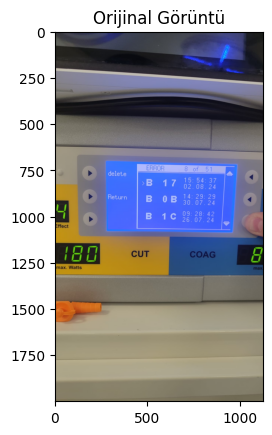

In [138]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pytesseract

# Görseli yükleyelim
image = cv2.imread(image_path)

# Görseli HSV renk alanına çevirelim
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Mavi rengi için daha geniş alt ve üst sınırlar belirleyelim
lower_blue = np.array([80, 80, 100])  # Mavi tonunu biraz daha aşağıya genişlettik
upper_blue = np.array([140, 140, 255])  # Mavi tonunun üst sınırını da genişlettik

# Renk aralığına göre maske oluşturalım
mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Maskeye göre orijinal görseldeki ilgili alanları çıkartalım
result = cv2.bitwise_and(image, image, mask=mask)

# Gri tonlama yapalım
gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

# Kenar tespiti yaparak bölgeyi bulmaya çalışalım
contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Ekranın hata kodlarını tespit etmek için doğru büyüklükte dikdörtgeni bulalım
screen_contour = None
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    # Boyut filtreleme: Ekran büyük bir dikdörtgen olduğu için belli bir boyutun altındaki konturları ele
    if w > 400 and h > 200:  # Ekranın tahmini genişlik ve yükseklik sınırları
        screen_contour = contour
        break

# Eğer ekran tespit edildiyse, bu bölgeyi kırpalım
if screen_contour is not None:
    x, y, w, h = cv2.boundingRect(screen_contour)
    cropped_image = image[y : y + h, x : x + w]  # Ekran bölgesini kırpalım

    # OCR ile sadece bu bölgeyi okuyalım
    custom_config = r"--oem 3 --psm 6"
    text = pytesseract.image_to_string(cropped_image, config=custom_config)

    # OCR ile okunan metni ekrana yazdıralım
    print("OCR ile tespit edilen metin:\n", text)

    # Kesilen bölgeyi ve OCR sonucunu gösterelim
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.show()
else:
    print("Ekran bölgesi tespit edilemedi.")